===== Exemple 1 =====
Les effectifs : [4. 0. 7. 0. 0. 5.]
binX : [0.5 1.5 2.5 3.5 4.5 5.5 6.5]
Nombre de classes : 6


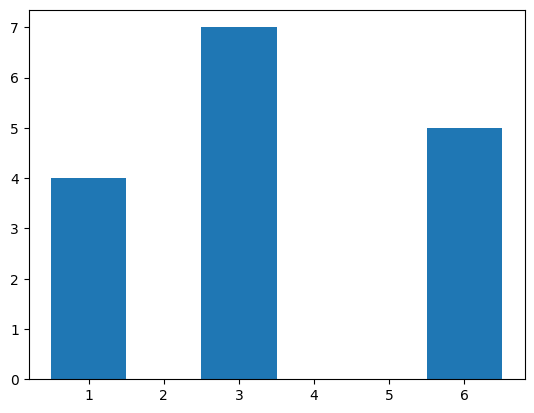

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple 1 : liste de quelques nombres entiers compris entre 1 et 6
X = [1, 3, 6, 6, 1, 3, 3, 6, 1, 3, 6, 6, 3, 1, 3, 3]

# histogramme des effectifs de X
print('===== Exemple 1 =====')
hX, binsX, _ = plt.hist(X, bins=np.arange(1, 8) - 0.5)

# informations sur l'histogramme
print(f'Les effectifs : {hX}')
print(f'binX : {binsX}')
print(f'Nombre de classes : {len(binsX) - 1}')



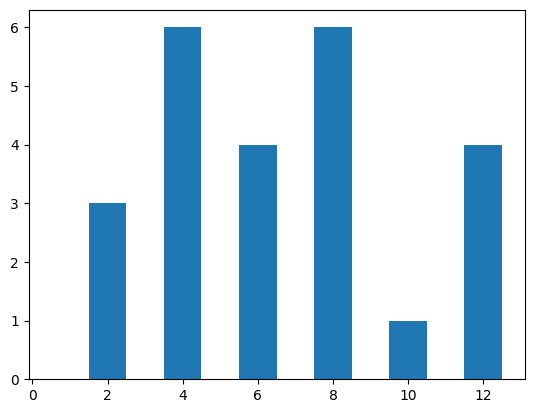

In [280]:
def lancer_de_6_faces(n):
    """Simule le lancer de n dés à 6 faces et retourne la liste des résultats."""
    return list(2*np.random.randint(1, 7, size=n))

H, binsH, _ = plt.hist(lancer_de_6_faces(24), bins=np.arange(1, 14) - 0.5)



APPROXIMATION DE PI (METHODE DE MONTE-CARLO)
Nombre total de fléchettes : 500
Nombre de fléchettes dans le quadrant : 381
Valeur approximative de pi : 3.048000



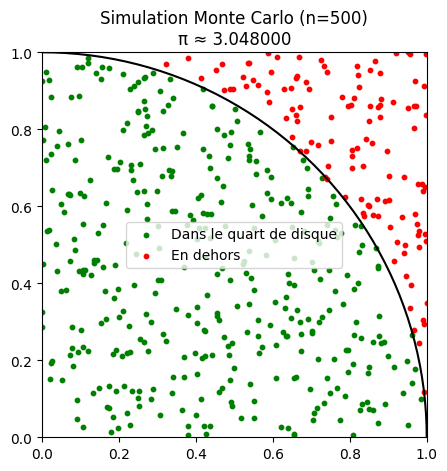

VALEUR APPROXIMATIVE D'UNE INTEGRALE
Nombre total de fléchettes : 7000
Nombre de fléchettes sous la courbe : 6159
Valeur approximative de l'intégrale : 0.261982
Valeur exacte de l'intégrale : 0.264241



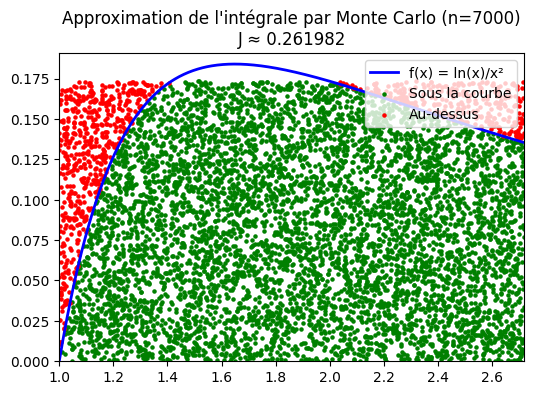

In [281]:
import random
import math
import matplotlib.pyplot as plt

# -------------------------------
# 1) Approximation de PI avec affichage
# -------------------------------
def approx_pi_graphique(n=500):
    x_in, y_in = [], []
    x_out, y_out = [], []
    darts_in_quarter = 0

    for _ in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            darts_in_quarter += 1
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)

    pi_estime = 4 * darts_in_quarter / n

    print("APPROXIMATION DE PI (METHODE DE MONTE-CARLO)")
    print(f"Nombre total de fléchettes : {n}")
    print(f"Nombre de fléchettes dans le quadrant : {darts_in_quarter}")
    print(f"Valeur approximative de pi : {pi_estime:.6f}\n")

    # --- Affichage graphique ---
    fig, ax = plt.subplots(figsize=(5,5))
    # contour quart de disque
    theta = [i * math.pi/200 for i in range(201)]
    cercle_x = [math.cos(t) for t in theta]
    cercle_y = [math.sin(t) for t in theta]
    ax.plot(cercle_x, cercle_y, color="black")

    # points
    ax.scatter(x_in, y_in, color="green", s=10, label="Dans le quart de disque")
    ax.scatter(x_out, y_out, color="red", s=10, label="En dehors")

    ax.set_aspect("equal")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(f"Simulation Monte Carlo (n={n})\nπ ≈ {pi_estime:.6f}")
    ax.legend()
    plt.show()


# -------------------------------
# 2) Approximation d'une intégrale avec affichage
#     J = ∫[1..e] ln(x)/x^2 dx
# -------------------------------
def approx_integrale_graphique(n=7000):
    a, b = 1, math.e
    f = lambda x: math.log(x)/x**2

    # estimation du maximum pour borner l'aire
    f_max = max(f(1.0001), f(1.1), f(2), f(math.e))

    x_in, y_in = [], []
    x_out, y_out = [], []
    darts_under_curve = 0

    for _ in range(n):
        x = random.uniform(a, b)
        y = random.uniform(0, f_max)
        if y <= f(x):
            darts_under_curve += 1
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)

    # aire du rectangle
    J_estime = (darts_under_curve / n) * (b - a) * f_max
    J_exact = 1 - 2/math.e

    print("VALEUR APPROXIMATIVE D'UNE INTEGRALE")
    print(f"Nombre total de fléchettes : {n}")
    print(f"Nombre de fléchettes sous la courbe : {darts_under_curve}")
    print(f"Valeur approximative de l'intégrale : {J_estime:.6f}")
    print(f"Valeur exacte de l'intégrale : {J_exact:.6f}\n")

    # --- Affichage graphique ---
    fig, ax = plt.subplots(figsize=(6,4))
    # tracer la courbe
    X = [a + i*(b-a)/500 for i in range(501)]
    Y = [f(x) for x in X]
    ax.plot(X, Y, color="blue", linewidth=2, label="f(x) = ln(x)/x²")

    # points
    ax.scatter(x_in, y_in, color="green", s=5, label="Sous la courbe")
    ax.scatter(x_out, y_out, color="red", s=5, label="Au-dessus")

    ax.set_xlim(a, b)
    ax.set_ylim(0, f_max*1.1)
    ax.set_title(f"Approximation de l'intégrale par Monte Carlo (n={n})\nJ ≈ {J_estime:.6f}")
    ax.legend()
    plt.show()


# -------------------------------
# Exécution
# -------------------------------
approx_pi_graphique(500)
approx_integrale_graphique(7000)


VALEUR APPROXIMATIVE D'UNE INTEGRALE DOUBLE
Nombre total de points : 100000
Nombre de points dans le domaine D : 49984
Valeur approximative de l'intégrale : 0.026602
Valeur exacte de l'intégrale : 0.026667


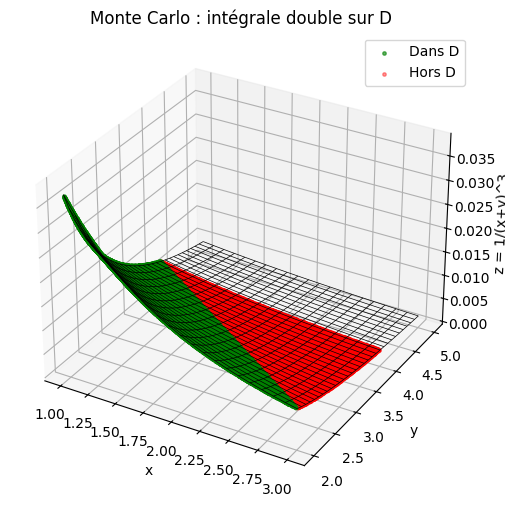

In [282]:
# -------------------------------
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour l'affichage 3D

# Paramètres
N_total = 100000      # nombre total de points tirés uniformément dans le rectangle
seed = 42             # graine pour reproductibilité

random.seed(seed)
np.random.seed(seed)

# Rectangle englobant
x_min, x_max = 1.0, 3.0
y_min, y_max = 2.0, 4.0
rect_area = (x_max - x_min) * (y_max - y_min)

# Fonction à intégrer
def f(x, y):
    return 1.0 / (x + y)**3

# Tirages aléatoires
xs = np.random.uniform(x_min, x_max, N_total)
ys = np.random.uniform(y_min, y_max, N_total)

# Sélection du domaine : x + y <= 5
inside = (xs + ys <= 5.0)
N_inside = np.count_nonzero(inside)

# Valeurs de f
vals = f(xs, ys) * inside.astype(float)
I_est = rect_area * vals.mean()

# Valeur exacte
I_exact = 2/75

# Résultats
print("VALEUR APPROXIMATIVE D'UNE INTEGRALE DOUBLE")
print(f"Nombre total de points : {N_total}")
print(f"Nombre de points dans le domaine D : {N_inside}")
print(f"Valeur approximative de l'intégrale : {I_est:.6f}")
print(f"Valeur exacte de l'intégrale : {I_exact:.6f}")

# --- Tracé 3D ---
# Surface
X, Y = np.meshgrid(np.arange(1.0, 3.1, 0.1), np.arange(2.0, 5.1, 0.1))
Z = 1.0 / (X + Y)**3

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='k', linewidth=0.5)

# Points D (verts)
xs_in, ys_in = xs[inside], ys[inside]
zs_in = 1.0 / (xs_in + ys_in)**3
ax.scatter(xs_in, ys_in, zs_in, color="green", s=6, alpha=0.6, label="Dans D")

# Points hors D (rouges)
xs_out, ys_out = xs[~inside], ys[~inside]
zs_out = 1.0 / (xs_out + ys_out)**3
ax.scatter(xs_out, ys_out, zs_out, color="red", s=6, alpha=0.4, label="Hors D")

# Axes et légende
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z = 1/(x+y)^3")
ax.set_title("Monte Carlo : intégrale double sur D")
ax.legend()
plt.show()
